In [25]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import math

In [26]:
RNASeq = pd.read_csv('AdjustedRPKMOutput/RNASeq_chrE.txt',sep='\t')
RPF = pd.read_csv('AdjustedRPKMOutput/RPF_chrE.txt',sep=' ')
# RNASeq_2 = pd.read_csv('RPKMOutput/RNASeq.txt',sep='\t')
# RPF_2 = pd.read_csv('RPKMOutput/RPF.txt',sep='\t')

In [27]:
RNASeq = RNASeq[(RNASeq['cdReads0'] >= 10) & (RNASeq['cdReads1'] >= 10) & (RNASeq['cdReads2'] >= 10)& (RNASeq['cdReads3'] >= 10)& (RNASeq['cdReads4'] >= 10)]
RPF = RPF[(RPF['cdReads0'] >= 10) & (RPF['cdReads1'] >= 10) & (RPF['cdReads2'] >= 10)& (RPF['cdReads3'] >= 10)& (RPF['cdReads4'] >= 10)]

# RNASeq_2 = RNASeq_2[(RNASeq_2['cdReads0'] >= 10) & (RNASeq_2['cdReads1'] >= 10) & (RNASeq_2['cdReads2'] >= 10)& (RNASeq_2['cdReads3'] >= 10)& (RNASeq_2['cdReads4'] >= 10)]
# RPF_2 = RPF_2[(RPF_2['cdReads0'] >= 10) & (RPF_2['cdReads1'] >= 10) & (RPF_2['cdReads2'] >= 10)& (RPF_2['cdReads3'] >= 10)& (RPF_2['cdReads4'] >= 10)]



In [7]:
# print(RNASeq.shape,RNASeq_2.shape,RPF.shape,RPF_2.shape)

In [8]:
RNASeq.head(5)

,AccNum,GeneName,cdReads0,cdRPKM0,cdReads1,cdRPKM1,cdReads2,cdRPKM2,cdReads3,cdRPKM3,cdReads4,cdRPKM4
0,NM_017847,ODR4,50.0,6.605436,62.0,5.568612,71.0,5.308751,30.0,2.859319,51.0,3.102104
2,NM_001003803,ATP5S,29.0,8.070253,52.0,9.838214,52.0,8.190209,19.0,3.814631,22.0,2.818815
3,NM_001003800,BICD2,778.0,54.632204,1155.0,55.141030,1444.0,57.390343,706.0,35.767093,883.0,28.548580
5,NM_016647,THEM6,170.0,48.892869,182.0,35.587031,219.0,35.648661,91.0,18.881992,99.0,13.109511
8,NM_016640,MRPS30,255.0,34.836170,348.0,32.321627,411.0,31.778583,205.0,20.204769,241.0,15.158699


In [9]:
# RNASeq_2.head(5)

In [10]:
RPF.head(5)

,AccNum,GeneName,cdReads0,cdRPKM0,cdReads1,cdRPKM1,cdReads2,cdRPKM2,cdReads3,cdRPKM3,cdReads4,cdRPKM4
0,NM_017847,ODR4,93.0,16.468792,62.0,13.189469,49.0,14.172717,37.0,9.403085,39.0,10.487249
2,NM_001003803,ATP5S,81.0,30.214920,83.0,37.193868,71.0,43.258655,46.0,24.625447,26.0,14.727463
3,NM_001003800,BICD2,501.0,47.157866,389.0,43.986848,284.0,43.662942,257.0,34.716778,230.0,32.874747
4,NM_016649,ESF1,69.0,6.525288,52.0,5.907596,41.0,6.333047,26.0,3.528692,26.0,3.733723
5,NM_016647,THEM6,132.0,50.888286,89.0,41.218361,73.0,45.966876,56.0,30.982880,33.0,19.318616


In [11]:
# RPF_2.head(5)

In [28]:
RNASeq[['cdRPKM0', 'cdRPKM1', 'cdRPKM2', 'cdRPKM3', 'cdRPKM4']] = RNASeq[['cdRPKM0', 'cdRPKM1', 'cdRPKM2', 'cdRPKM3', 'cdRPKM4']].apply(np.log2)

In [13]:
# RNASeq_2[['cdRPKM0', 'cdRPKM1', 'cdRPKM2', 'cdRPKM3', 'cdRPKM4']] = RNASeq_2[['cdRPKM0', 'cdRPKM1', 'cdRPKM2', 'cdRPKM3', 'cdRPKM4']].apply(np.log2)

In [14]:
RNASeq.head(5)

,AccNum,GeneName,cdReads0,cdRPKM0,cdReads1,cdRPKM1,cdReads2,cdRPKM2,cdReads3,cdRPKM3,cdReads4,cdRPKM4
0,NM_017847,ODR4,50.0,2.723654,62.0,2.477318,71.0,2.408372,30.0,1.515671,51.0,1.633247
2,NM_001003803,ATP5S,29.0,3.012614,52.0,3.298396,52.0,3.033900,19.0,1.931544,22.0,1.495089
3,NM_001003800,BICD2,778.0,5.771680,1155.0,5.785054,1444.0,5.842736,706.0,5.160561,883.0,4.835347
5,NM_016647,THEM6,170.0,5.611552,182.0,5.153280,219.0,5.155776,91.0,4.238939,99.0,3.712542
8,NM_016640,MRPS30,255.0,5.122514,348.0,5.014428,411.0,4.989983,205.0,4.336624,241.0,3.922074


In [ ]:
RNASeq_2.head(5)

In [29]:
RPF[['cdRPKM0', 'cdRPKM1', 'cdRPKM2', 'cdRPKM3', 'cdRPKM4']] = RPF[['cdRPKM0', 'cdRPKM1', 'cdRPKM2', 'cdRPKM3', 'cdRPKM4']].apply(np.log2)
RPF.head(5)


,AccNum,GeneName,cdReads0,cdRPKM0,cdReads1,cdRPKM1,cdReads2,cdRPKM2,cdReads3,cdRPKM3,cdReads4,cdRPKM4
0,NM_017847,ODR4,93.0,4.041663,62.0,3.721315,49.0,3.825044,37.0,3.233134,39.0,3.390564
2,NM_001003803,ATP5S,81.0,4.917189,83.0,5.216993,71.0,5.434917,46.0,4.622078,26.0,3.880437
3,NM_001003800,BICD2,501.0,5.559427,389.0,5.459000,284.0,5.448337,257.0,5.117561,230.0,5.038908
4,NM_016649,ESF1,69.0,2.706042,52.0,2.562571,41.0,2.662900,26.0,1.819134,26.0,1.900615
5,NM_016647,THEM6,132.0,5.669262,89.0,5.365215,73.0,5.522523,56.0,4.953399,33.0,4.271920


In [30]:
RNASeq['log2cdRPKM1']=RNASeq['cdRPKM1']-RNASeq['cdRPKM0']
RNASeq['log2cdRPKM2']=RNASeq['cdRPKM2']-RNASeq['cdRPKM0']
RNASeq['log2cdRPKM3']=RNASeq['cdRPKM3']-RNASeq['cdRPKM0']
RNASeq['log2cdRPKM4']=RNASeq['cdRPKM4']-RNASeq['cdRPKM0']

In [31]:
RPF['log2cdRPKM1']=RPF['cdRPKM1']-RPF['cdRPKM0']
RPF['log2cdRPKM2']=RPF['cdRPKM2']-RPF['cdRPKM0']
RPF['log2cdRPKM3']=RPF['cdRPKM3']-RPF['cdRPKM0']
RPF['log2cdRPKM4']=RPF['cdRPKM4']-RPF['cdRPKM0']

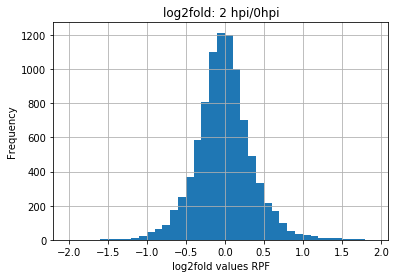

In [21]:

plt.hist(RPF['log2cdRPKM1'], bins = np.arange(-2.0,2.0,0.1))


plt.xlabel('log2fold values RPF')
plt.ylabel('Frequency')
plt.title('log2fold: 2 hpi/0hpi')
# plt.axis(-2,2)
plt.grid(True)

plt.show()

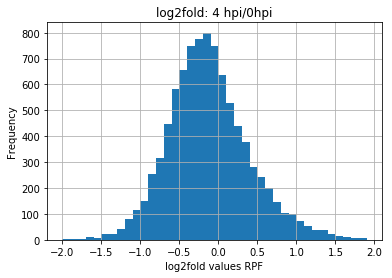

In [22]:

plt.hist(RPF['log2cdRPKM2'], bins = np.arange(-2.0,2.0,0.1))


plt.xlabel('log2fold values RPF')
plt.ylabel('Frequency')
plt.title('log2fold: 4 hpi/0hpi')
# plt.axis(-2,2)
plt.grid(True)

plt.show()

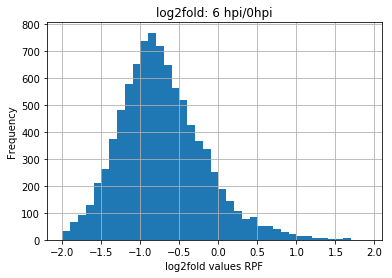

In [23]:

plt.hist(RPF['log2cdRPKM3'], bins = np.arange(-2.0,2.0,0.1))


plt.xlabel('log2fold values RPF')
plt.ylabel('Frequency')
plt.title('log2fold: 6 hpi/0hpi')
# plt.axis(-2,2)
plt.grid(True)

plt.show()

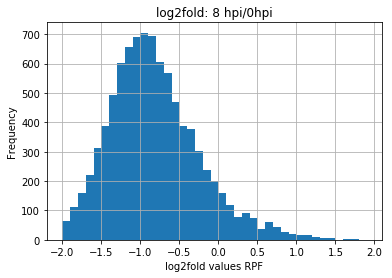

In [24]:

plt.hist(RPF['log2cdRPKM4'], bins = np.arange(-2.0,2.0,0.1))


plt.xlabel('log2fold values RPF')
plt.ylabel('Frequency')
plt.title('log2fold: 8 hpi/0hpi')
# plt.axis(-2,2)
plt.grid(True)

plt.show()

In [ ]:
RNASeq_2['log2cdRPKM1']=RNASeq_2['cdRPKM1']-RNASeq_2['cdRPKM0']
RNASeq_2['log2cdRPKM2']=RNASeq_2['cdRPKM2']-RNASeq_2['cdRPKM0']
RNASeq_2['log2cdRPKM3']=RNASeq_2['cdRPKM3']-RNASeq_2['cdRPKM0']
RNASeq_2['log2cdRPKM4']=RNASeq_2['cdRPKM4']-RNASeq_2['cdRPKM0']

In [ ]:
RNASeq.head(5)

In [ ]:
RNASeq_2.head(5)

In [ ]:
filteredRNASeq = RNASeq_2[(RNASeq_2['log2cdRPKM1'] <= 0.5) 
                        & (RNASeq_2['log2cdRPKM2'] <= 0.5)
                        & (RNASeq_2['log2cdRPKM3'] <= 0.5)
                        & (RNASeq_2['log2cdRPKM4'] <= 0.5)]
filteredRNASeq = filteredRNASeq[(filteredRNASeq['log2cdRPKM1'] >= -0.5) 
                                & (filteredRNASeq['log2cdRPKM2'] >= -0.5)
                                & (filteredRNASeq['log2cdRPKM3'] >= -0.5)
                                & (filteredRNASeq['log2cdRPKM4'] >= -0.5)]



In [ ]:
filteredRNASeq = RNASeq[(RNASeq['log2cdRPKM1'] <= 0.5) 
                        & (RNASeq['log2cdRPKM2'] <= 0.5)
                        & (RNASeq['log2cdRPKM3'] <= 0.5)
                        & (RNASeq['log2cdRPKM4'] <= 0.5)]
filteredRNASeq = filteredRNASeq[(filteredRNASeq['log2cdRPKM1'] >= -0.5) 
                                & (filteredRNASeq['log2cdRPKM2'] >= -0.5)
                                & (filteredRNASeq['log2cdRPKM3'] >= -0.5)
                                & (filteredRNASeq['log2cdRPKM4'] >= -0.5)]



In [ ]:
filteredRNASeq.head(5)

In [ ]:
print(filteredRNASeq.shape)

In [32]:
TE = reduce(lambda left,right: pd.merge(left,right,on=['AccNum','GeneName']), [RPF,RNASeq])
TE.head()

,AccNum,GeneName,cdReads0_x,cdRPKM0_x,cdReads1_x,cdRPKM1_x,cdReads2_x,cdRPKM2_x,cdReads3_x,cdRPKM3_x,...,cdReads2_y,cdRPKM2_y,cdReads3_y,cdRPKM3_y,cdReads4_y,cdRPKM4_y,log2cdRPKM1_y,log2cdRPKM2_y,log2cdRPKM3_y,log2cdRPKM4_y
0,NM_017847,ODR4,93.0,4.041663,62.0,3.721315,49.0,3.825044,37.0,3.233134,...,71.0,2.408372,30.0,1.515671,51.0,1.633247,-0.246336,-0.315281,-1.207982,-1.090407
1,NM_001003803,ATP5S,81.0,4.917189,83.0,5.216993,71.0,5.434917,46.0,4.622078,...,52.0,3.033900,19.0,1.931544,22.0,1.495089,0.285783,0.021286,-1.081070,-1.517525
2,NM_001003800,BICD2,501.0,5.559427,389.0,5.459000,284.0,5.448337,257.0,5.117561,...,1444.0,5.842736,706.0,5.160561,883.0,4.835347,0.013375,0.071056,-0.611119,-0.936333
3,NM_016647,THEM6,132.0,5.669262,89.0,5.365215,73.0,5.522523,56.0,4.953399,...,219.0,5.155776,91.0,4.238939,99.0,3.712542,-0.458273,-0.455776,-1.372613,-1.899010
4,NM_016640,MRPS30,281.0,5.685293,216.0,5.570369,128.0,5.258698,100.0,4.715900,...,411.0,4.989983,205.0,4.336624,241.0,3.922074,-0.108086,-0.132531,-0.785890,-1.200440


In [33]:
TE.shape

(8989, 30)

In [34]:
TE['cdRPKM0_x'] = TE['cdRPKM0_x']-TE['cdRPKM0_y']
TE['cdRPKM1_x'] = TE['cdRPKM1_x']-TE['cdRPKM1_y']
TE['cdRPKM2_x'] = TE['cdRPKM2_x']-TE['cdRPKM2_y']
TE['cdRPKM3_x'] = TE['cdRPKM3_x']-TE['cdRPKM3_y']
TE['cdRPKM4_x'] = TE['cdRPKM4_x']-TE['cdRPKM4_y']
for i in range(0,5):
    TE.rename(columns={'cdRPKM'+str(i)+'_x':'TE'+str(i)}, inplace=True)
TE = TE[['AccNum', 'GeneName','TE0','TE1','TE2','TE3','TE4']]
TE.head()

,AccNum,GeneName,TE0,TE1,TE2,TE3,TE4
0,NM_017847,ODR4,1.318009,1.243997,1.416672,1.717463,1.757317
1,NM_001003803,ATP5S,1.904575,1.918597,2.401017,2.690534,2.385348
2,NM_001003800,BICD2,-0.212253,-0.326054,-0.394399,-0.043000,0.203561
3,NM_016647,THEM6,0.057710,0.211936,0.366747,0.714460,0.559378
4,NM_016640,MRPS30,0.562779,0.555941,0.268715,0.379276,0.831364


In [35]:
TE['foldTE1']=TE['TE1']-TE['TE0']
TE['foldTE2']=TE['TE2']-TE['TE0']
TE['foldTE3']=TE['TE3']-TE['TE0']
TE['foldTE4']=TE['TE4']-TE['TE0']

In [36]:
TE.head(5)

,AccNum,GeneName,TE0,TE1,TE2,TE3,TE4,foldTE1,foldTE2,foldTE3,foldTE4
0,NM_017847,ODR4,1.318009,1.243997,1.416672,1.717463,1.757317,-0.074012,0.098663,0.399454,0.439308
1,NM_001003803,ATP5S,1.904575,1.918597,2.401017,2.690534,2.385348,0.014021,0.496441,0.785959,0.480773
2,NM_001003800,BICD2,-0.212253,-0.326054,-0.394399,-0.043000,0.203561,-0.113801,-0.182145,0.169253,0.415814
3,NM_016647,THEM6,0.057710,0.211936,0.366747,0.714460,0.559378,0.154226,0.309037,0.656751,0.501668
4,NM_016640,MRPS30,0.562779,0.555941,0.268715,0.379276,0.831364,-0.006838,-0.294065,-0.183503,0.268585


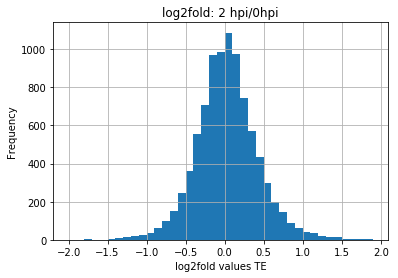

In [37]:
plt.hist(TE['foldTE1'], bins = np.arange(-2.0,2.0,0.1))


plt.xlabel('log2fold values TE')
plt.ylabel('Frequency')
plt.title('log2fold: 2 hpi/0hpi')
# plt.axis(-2,2)
plt.grid(True)

plt.show()

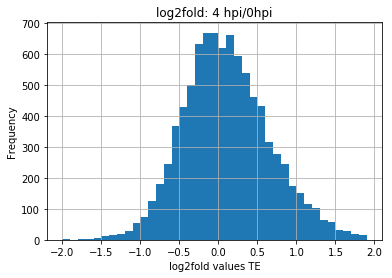

In [38]:
plt.hist(TE['foldTE2'], bins = np.arange(-2.0,2.0,0.1))


plt.xlabel('log2fold values TE')
plt.ylabel('Frequency')
plt.title('log2fold: 4 hpi/0hpi')
# plt.axis(-2,2)
plt.grid(True)

plt.show()

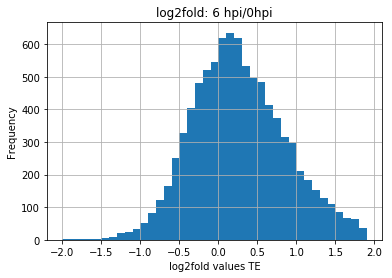

In [39]:
plt.hist(TE['foldTE3'], bins = np.arange(-2.0,2.0,0.1))


plt.xlabel('log2fold values TE')
plt.ylabel('Frequency')
plt.title('log2fold: 6 hpi/0hpi')
# plt.axis(-2,2)
plt.grid(True)

plt.show()

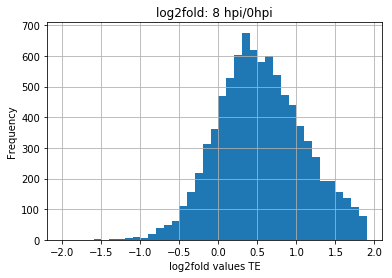

In [40]:
plt.hist(TE['foldTE4'], bins = np.arange(-2.0,2.0,0.1))


plt.xlabel('log2fold values TE')
plt.ylabel('Frequency')
plt.title('log2fold: 8 hpi/0hpi')
# plt.axis(-2,2)
plt.grid(True)

plt.show()

In [ ]:
TE.to_csv('RPKMOutput/TE_filtered2.txt',sep='\t',index=False)

In [ ]:
previous = 'AdjustedRPKMOutput/RPF_chrE/geneTXCD_RPKMoutput_EVadjusted_ReadOutput_'
timepoints = ['ATCACG-s_7_1_genome.txt','TTAGGC-s_7_1_genome.txt',
             'CAGATC-s_7_1_genome.txt','GCCAAT-s_7_1_genome.txt',
             'CTTGTA-s_7_1_genome.txt'
            ]
dataframes = []
for idx,file in enumerate(timepoints):
    df = pd.read_csv(previous+file, sep="	", na_values=['-'])
    df = df.dropna(how='any')
    df = df[['AccNum', 'GeneName','cdReads',
       'cdRPKM']]
    df.rename(columns={'cdRPKM':'cdRPKM'+str(idx), 'cdReads':'cdReads'+str(idx)}, inplace=True)
    dataframes.append(df)

In [ ]:
previous = 'AdjustedRPKMOutput/RNASeq_chrE/geneTXCD_RPKMoutput_EVadjusted_ReadOutput_'
timepoints = ['ATCACG-s_6_1_genome.txt','TTAGGC-s_6_1_genome.txt',
             'CAGATC-s_6_1_genome.txt','GCCAAT-s_6_1_genome.txt',
             'CTTGTA-s_6_1_genome.txt'
            ]
dataframes = []
for idx,file in enumerate(timepoints):
    df = pd.read_csv(previous+file, sep="	", na_values=['-'])
    df = df.dropna(how='any')
    df = df[['AccNum', 'GeneName','cdReads',
       'cdRPKM']]
    df.rename(columns={'cdRPKM':'cdRPKM'+str(idx), 'cdReads':'cdReads'+str(idx)}, inplace=True)
    dataframes.append(df)

In [ ]:
df_rnaseq = reduce(lambda left,right: pd.merge(left,right,on=['AccNum','GeneName']), dataframes)
df_rnaseq.to_csv('AdjustedRPKMOutput/RNASeq_chrE.txt',sep='\t',index=False)